In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

2024-04-05 17:46:13.519537: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

(train_images, train_labels), (_,_) = datasets.cifar10.load_data()
train_images = train_images.reshape((50000,32,32,3))

train_images = train_images.astype('float32')/255


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

(train_images, train_labels), (_, _) = datasets.cifar10.load_data()

# Convert pixel values to floats and normalize them to the range [0, 1]
train_images = train_images.astype('float32') / 255

def create_ann_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(76, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

input_shape = (32, 32, 3)  # Correct input shape for CIFAR-10 images
num_classes = 10
ann_model = create_ann_model(input_shape, num_classes)
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann_history = ann_model.fit(train_images, train_labels, epochs=10, batch_size=64)


2024-04-05 16:18:27.805170: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2476 - loss: 2.0125
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3707 - loss: 1.7473
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4006 - loss: 1.6638
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4229 - loss: 1.6066
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4372 - loss: 1.5634
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4440 - loss: 1.5588
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4452 - loss: 1.5355
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4538 - loss: 1.5180
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4503 - loss: 1.5139
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4646 - loss: 1.5008


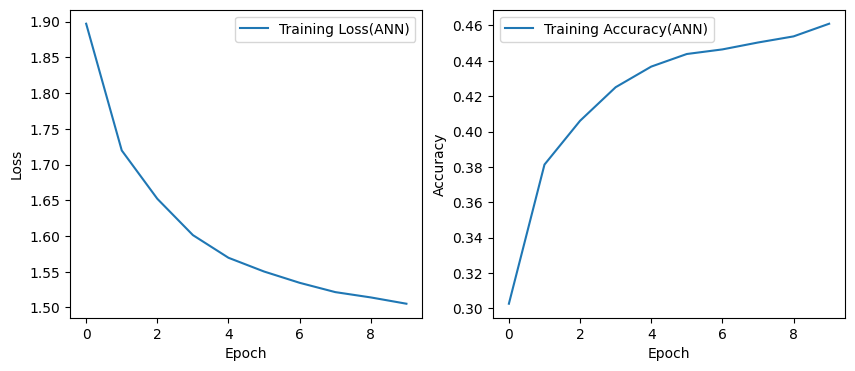

In [2]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

plt.plot(ann_history.history['loss'], label='Training Loss(ANN)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


# plt.figure(figsize=(10,4))
plt.subplot(1,2,2)

plt.plot(ann_history.history['accuracy'], label='Training Accuracy(ANN)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [3]:
(train_images, train_labels), (_,_) = datasets.cifar10.load_data()
train_images = train_images.reshape((50000,32,32,3))

train_images = train_images.astype('float32')/255

def create_cnn_model(input_shape, num_classes):
    model=models.Sequential()
    model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64,(3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64,(3,3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [4]:
input_shape = (32,32,3)
num_classes =10
cnn_model = create_cnn_model(input_shape,num_classes)
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [5]:
cnn_history = cnn_model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - accuracy: 0.3378 - loss: 1.7895
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.5474 - loss: 1.2634
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step - accuracy: 0.6205 - loss: 1.0661
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.6627 - loss: 0.9546
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.6936 - loss: 0.8587


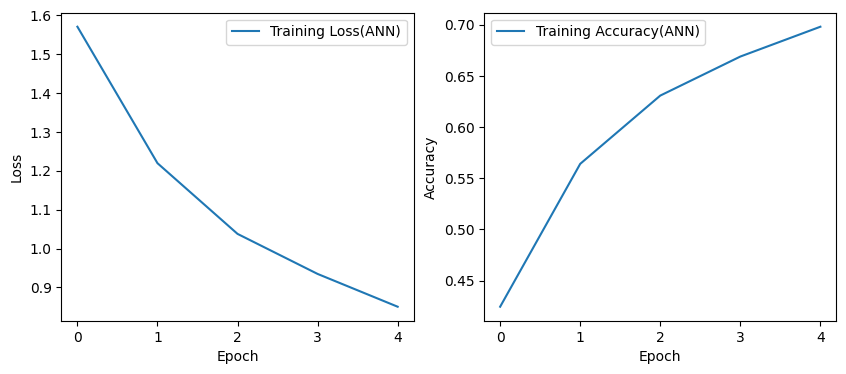

In [6]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

plt.plot(cnn_history.history['loss'], label='Training Loss(ANN)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


# plt.figure(figsize=(10,4))
plt.subplot(1,2,2)

plt.plot(cnn_history.history['accuracy'], label='Training Accuracy(ANN)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [8]:
# (train_images, train_labels), (_,_) = datasets.mnist.load_data()
(train_images, train_labels), (_, _) = datasets.cifar10.load_data()

In [9]:
def create_cnn_model(input_shape, num_classes):
    model=models.Sequential()
    model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64,(3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64,(3,3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [10]:
input_shape = (32,32,3)
num_classes =10
cnn_model = create_cnn_model(input_shape,num_classes)
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
cnn_history = cnn_model.fit(train_images, train_labels, epochs=20, batch_size=150)

Epoch 1/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 29s 80ms/step - accuracy: 0.2490 - loss: 3.2475
Epoch 2/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 44s 131ms/step - accuracy: 0.4713 - loss: 1.4610
Epoch 3/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 34s 102ms/step - accuracy: 0.5527 - loss: 1.2565
Epoch 4/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 32s 96ms/step - accuracy: 0.5929 - loss: 1.1513
Epoch 5/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 33s 99ms/step - accuracy: 0.6316 - loss: 1.0447
Epoch 6/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 34s 102ms/step - accuracy: 0.6562 - loss: 0.9773
Epoch 7/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 32s 97ms/step - accuracy: 0.6883 - loss: 0.8974
Epoch 8/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 33s 99ms/step - accuracy: 0.7046 - loss: 0.8439
Epoch 9/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 35s 104ms/step - accuracy: 0.7172 - loss: 0.8048
Epoch 10/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 32s 95ms/step - accuracy: 0.7406 - loss: 0.7390
Epoch 11/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 34s 101ms/step - accuracy: 0.7493 - loss: 0.7071
Epoch 12/20
334/334 ━━━━━

In [ ]:
# Varsha code
def create_cnn_model(input_shape,num_classes):
    model=models.Sequential()
    model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=input_shape))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64,(3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64,(3,3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(num_classes,activation='softmax'))
    return model

input_shape = (32, 32, 3)
num_classes = 10
cnn_model = create_cnn_model(input_shape, num_classes)
cnn_model.compile(optimizer = 'adam', 
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

cnn_history = cnn_model.fit(train_images, train_labels, epochs = 50, batch_size = 64)

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 38ms/step - accuracy: 0.3441 - loss: 1.7719
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.5514 - loss: 1.2484
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.6246 - loss: 1.0701
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.6543 - loss: 0.9761
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.6902 - loss: 0.8841
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.7138 - loss: 0.8189
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.7357 - loss: 0.7552
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.7488 - loss: 0.7209
Epoch 9/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 62ms/step - accuracy: 0.7637 - loss: 0.6745
Epoch 10/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.7804 - loss: 0.6294
Epoch 11/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 71ms/step - accuracy: 0.7879 - loss: 0.6054
Epoch 12/50
782/782 ━━━━━━━━━━

In [13]:
train_images.shape

(50000, 3072)

In [24]:
32*32

1024

In [25]:
28*28

784

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
(train_images, train_labels), (_, _) = datasets.cifar10.load_data()

train_images = train_images.reshape((50000, 32*32*3))
train_images = train_images.astype('float32')/255

In [34]:
def create_ann_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model


In [35]:
input_shape = (32, 32, 3)
num_classes =10
ann_model = create_ann_model(input_shape,num_classes)
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
ann_history = ann_model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 3072), dtype=float32). Expected shape (None, 32, 32, 3), but input has incompatible shape (None, 3072)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 3072), dtype=float32)
  • training=True
  • mask=None